In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft


## 1)
Load the file signal_hw.bin in f. Display the signal f . What is its length N ?

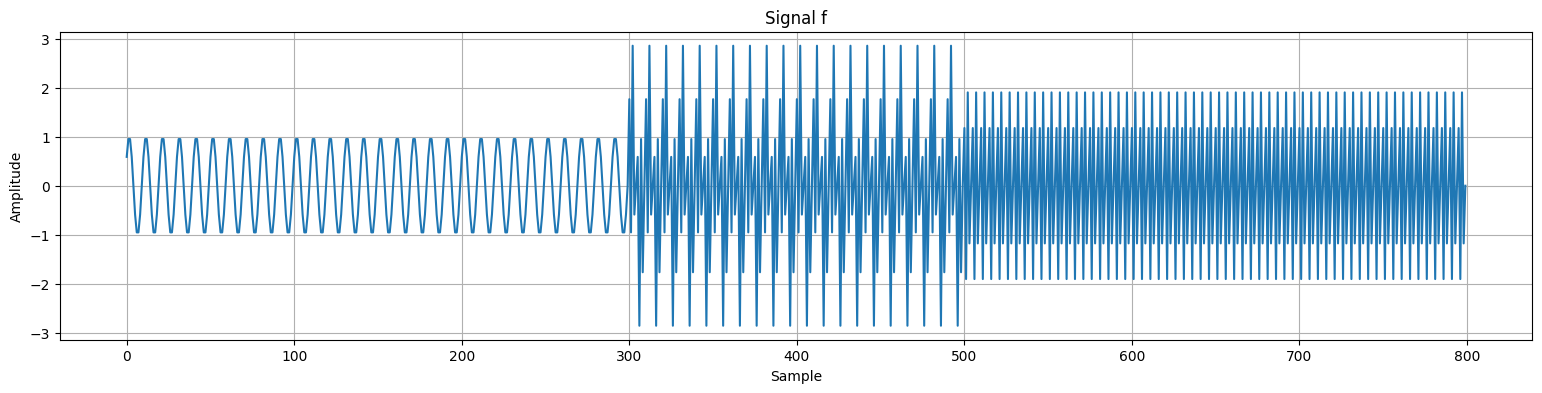

The length of the signal (N) is: 800


In [6]:
# Load the file into a NumPy array
file_path = 'signal_hw.txt'
file = open(file_path)
line = file.readline()
f = [float(i) for i in line.split(",")]
file.close()
plt.figure(figsize=(19, 4))
plt.plot(f)
plt.title('Signal f')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

N = len(f)
print(f"The length of the signal (N) is: {N}")

## 2)
Compute the fft of f by zero-padding to obtain a signal of length 2^10. Display the
amplitude and phase in the usual way.

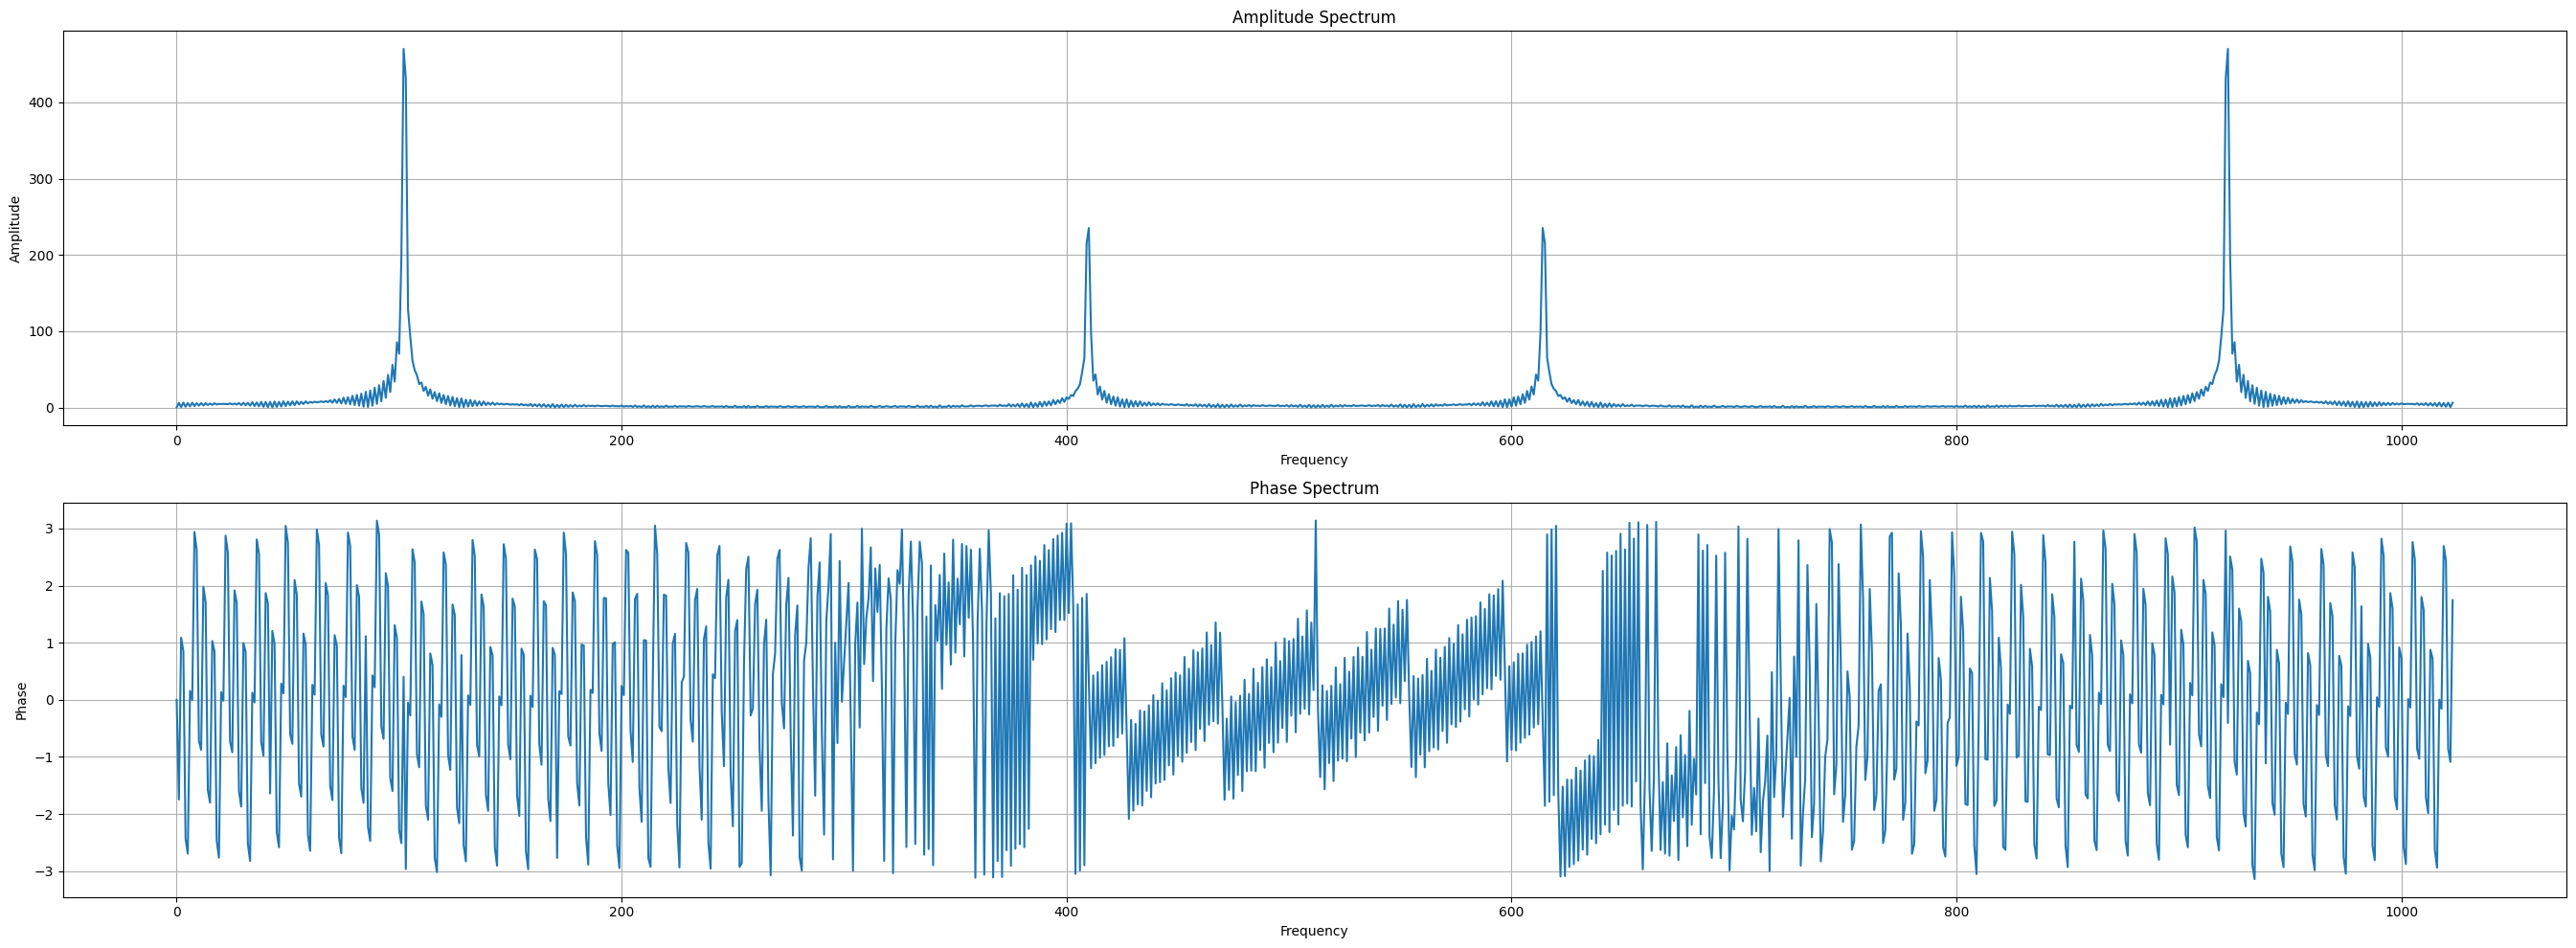

In [7]:
desired_length = 2**10

# Zero-pad the signal 'f' to the desired length
padded_f = np.pad(f, (0, desired_length - len(f)), mode='constant', constant_values=0)

# Compute the FFT of the zero-padded signal
fft_result = np.fft.fft(padded_f)
fft_result = np.fft.fftshift(fft_result)

# Calculate the amplitude and phase spectra
amplitude = np.abs(fft_result)
phase = np.angle(fft_result)

# Display the amplitude and phase spectra
plt.figure(figsize=(27, 10))

plt.subplot(2, 1, 1)
plt.plot(np.arange(len(amplitude)), amplitude)
plt.title('Amplitude Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(np.arange(len(phase)), phase)
plt.title('Phase Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Phase')
plt.grid(True)

plt.tight_layout()
plt.show()

## 3)
Create a new signal fr by time inversion. Display the signal f r and repeat question
2. for f r.

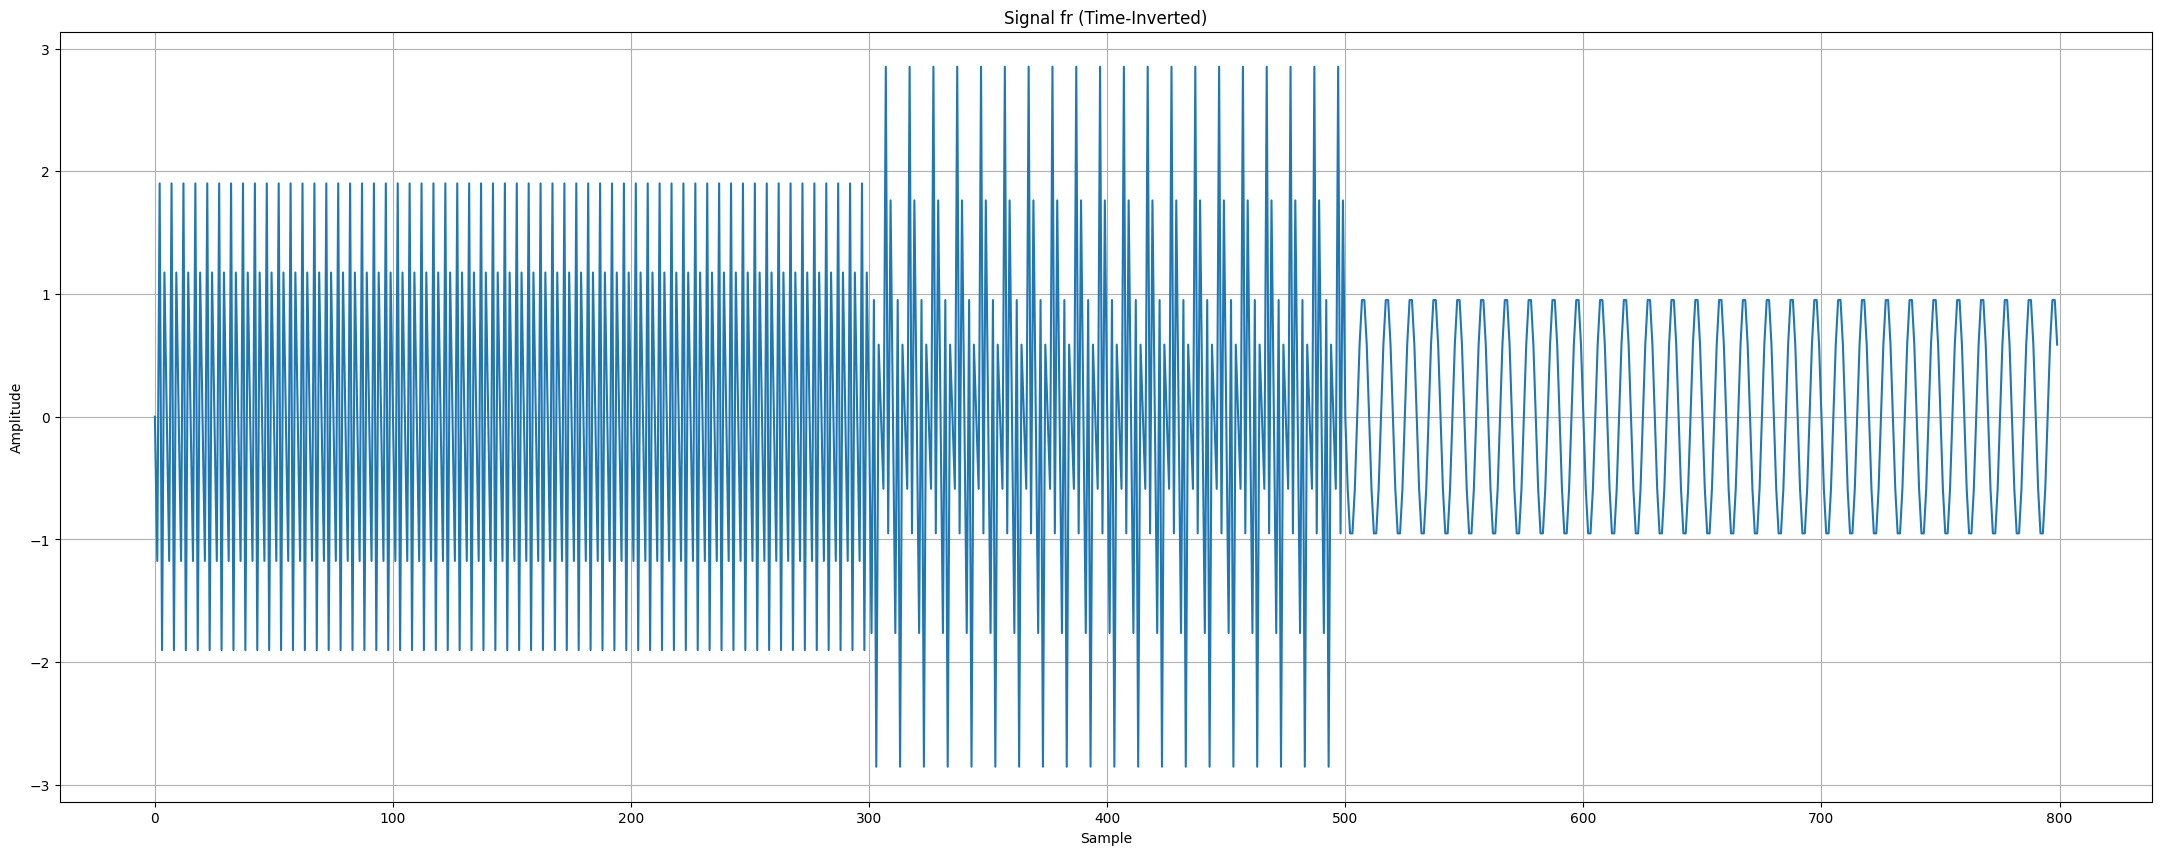

In [9]:
fr = np.flip(f)

# Display the signal fr
plt.figure(figsize=(27, 10))
plt.plot(fr)
plt.title('Signal fr (Time-Inverted)')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

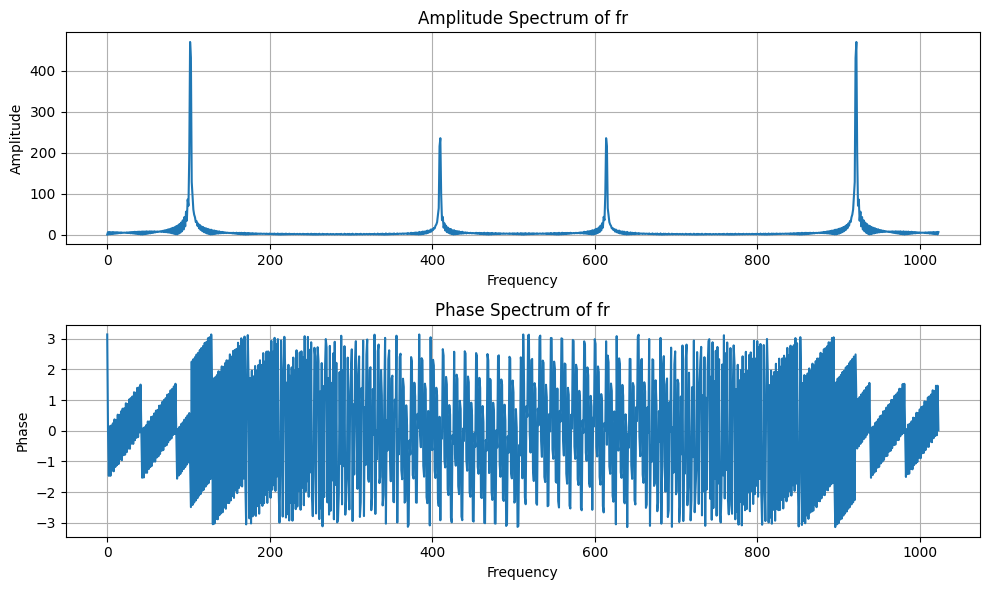

In [10]:
desired_length = 2**10

# Zero-pad the signal 'fr' to the desired length
padded_fr = np.pad(fr, (0, desired_length - len(fr)), mode='constant', constant_values=0)

# Compute the FFT of the zero-padded signal 'padded_fr'
fft_result_fr = np.fft.fft(padded_fr)
fft_result_fr = np.fft.fftshift(fft_result_fr)

# Calculate the amplitude and phase spectra of fr
amplitude_fr = np.abs(fft_result_fr)
phase_fr = np.angle(fft_result_fr)

# Display the amplitude and phase spectra of fr
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(np.arange(len(amplitude_fr)), amplitude_fr)
plt.title('Amplitude Spectrum of fr')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(np.arange(len(phase_fr)), phase_fr)
plt.title('Phase Spectrum of fr')
plt.xlabel('Frequency')
plt.ylabel('Phase')
plt.grid(True)

plt.tight_layout()
plt.show()

## 4)
What does the preceding tell you about the two signals?

#The amplitudes of the original and inverted signals look similar, suggesting no change in the signal strength. However, the phase is different; the pattern seen before has shifted, and the noise observed between the peaks is gone in the inverted signal.

## 5)
Use stft to compute the WFT for common windows sizes of f and f r.



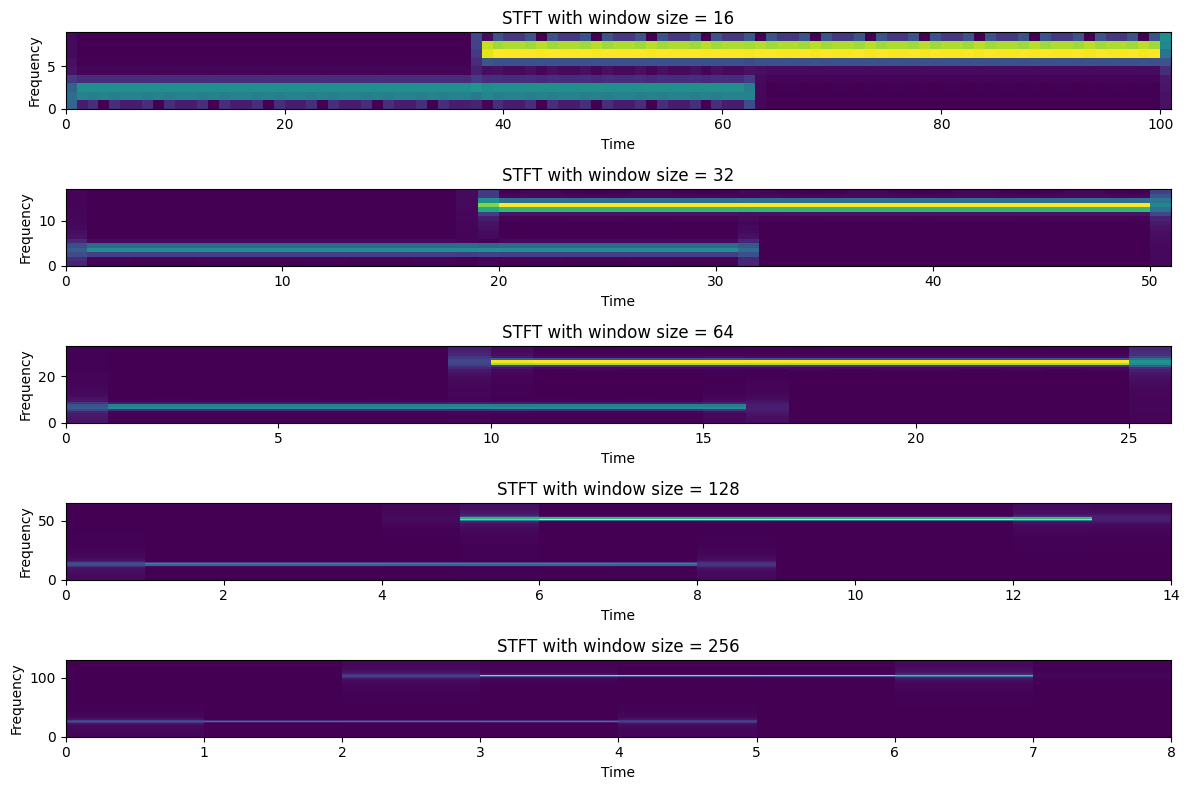

In [24]:
 file_path = 'signal_hw.txt'
 file = open(file_path)
 line = file.readline()
 f = [float(i) for i in line.split(",")]

# Common window sizes
#I know that there is no need to plot the window on different sizes, as soon as you understand that it has two frequencies in the middle, it is enough, but I drew it myself for a better understanding:)
window_sizes = [16, 32, 64, 128, 256]
plt.figure(figsize=(12, 8))

for idx, window in enumerate(window_sizes):
    # Compute STFT with varying window sizes
    _, _, Zxx = stft(f, nperseg=window)

    # Plot spectrogram (magnitude of STFT)
    plt.subplot(len(window_sizes), 1, idx + 1)
    plt.pcolormesh(np.abs(Zxx))
    plt.title(f'STFT with window size = {window}')
    plt.ylabel('Frequency')
    plt.xlabel('Time')

plt.tight_layout()
plt.show()

## 6&7)
What does this tell you about the signals?
Can you propose a definition of f (and thus f r)?

#The signals show two main frequencies when we use STFT, indicating distinct patterns in the signal.

#So We can see the function of f acts like a sin function. We can propose something like:

#f = np.sin(2 * np.pi * 5 * t) + 0.5 * np.sin(2 * np.pi * 10 * t).

#f(t)=sin(2π⋅5⋅t)+0.5⋅sin(2π⋅10⋅t) and fr(t)=sin(2π⋅5⋅(−t))+0.5⋅sin(2π⋅10⋅(−t))(t)=sin(2π⋅5⋅(−t))+0.5⋅sin(2π⋅10⋅(−t))

This represents a signal f composed of a sine wave with a frequency of 5 Hz and another with a frequency of 10 Hz.


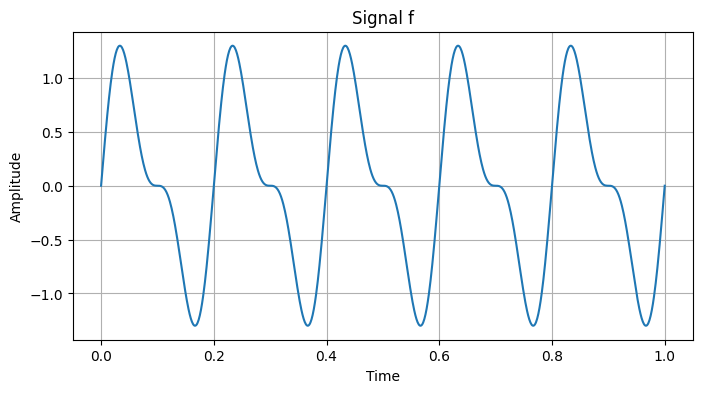

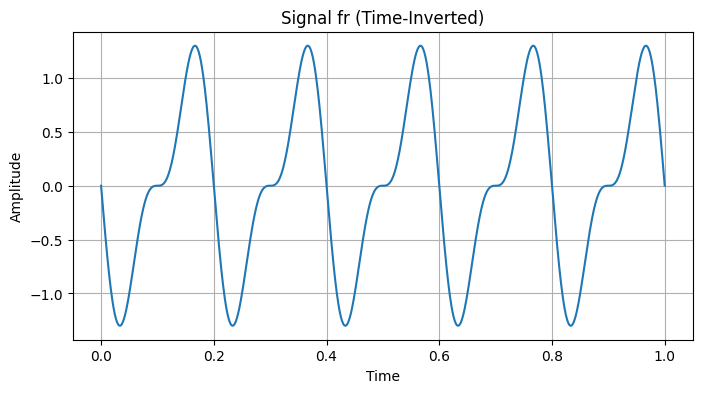

In [19]:

t = np.linspace(0, 1, 1000) 
f = np.sin(2 * np.pi * 5 * t) + 0.5 * np.sin(2 * np.pi * 10 * t)

# Create the time-inverted signal 'fr'
#I know is not necessary but by doing this part i wanted to show that Fourier analysis of a time-reversed signal shows how operations in the time domain can affect the phase and time sequence of a signal while preserving its spectral content in the frequency domain, allowing us to interrelate between the time domain and Understand the frequency.
fr = np.flip(f)

# Plot the original signal 'f'
plt.figure(figsize=(8, 4))
plt.plot(t, f)
plt.title('Signal f')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Plot the time-inverted signal 'fr'
plt.figure(figsize=(8, 4))
plt.plot(t, fr)
plt.title('Signal fr (Time-Inverted)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()